In [ ]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Use seaborn for plotting defaults
import seaborn as sns; sns.set()

In [ ]:
from sklearn.datasets import load_iris

# load iris dataset
iris = load_iris()
X = iris.data
y = iris.target


Let's fit a K-neighbors classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

Now we'll use this classifier to predict labels for the data



In [ ]:
y_pred = knn.predict(X)

Finally, we can check how well our prediction did:


In [ ]:
print("{0} / {1} correct".format(np.sum(y == y_pred), len(y)))

150 / 150 correct


It seems we have a perfect classifier!

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape

((112, 4), (38, 4))

Now we train on the training data, and validate on the test data:

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("{0} / {1} correct".format(np.sum(y_test == y_pred), len(y_test)))

37 / 38 correct


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9736842105263158

In [ ]:
knn.score(X_test, y_test)

0.9736842105263158

In [ ]:
for n_neighbors in [1, 5, 10, 20, 30]:
      knn = KNeighborsClassifier(n_neighbors)
      knn.fit(X_train, y_train)
      print(n_neighbors, knn.score(X_test, y_test))

1 0.9736842105263158
5 0.9736842105263158
10 0.9736842105263158
20 0.9473684210526315
30 0.9736842105263158


In [ ]:
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.5, random_state=0)
X1.shape, X2.shape

((75, 4), (75, 4))

In [ ]:
print(KNeighborsClassifier(1).fit(X2, y2).score(X1, y1))
print(KNeighborsClassifier(1).fit(X1, y1).score(X2, y2))

0.96
0.9066666666666666


In [ ]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(KNeighborsClassifier(1), X, y, cv=10)
cv.mean()

0.96

In [ ]:
cross_val_score(KNeighborsClassifier(1), X, y, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
       1.        , 0.86666667, 1.        , 1.        , 1.        ])

In [ ]:
def make_data(N=40, error=1.0, random_seed=1):

      np.random.seed(1)
      X = np.random.random(N)[:, np.newaxis]
      y = test_func(X.ravel(), error)

      return X, y

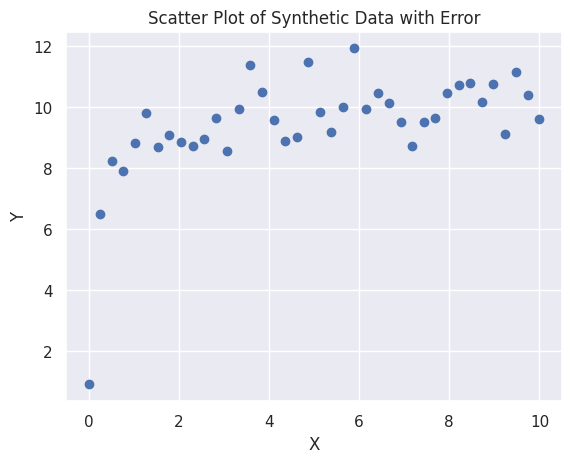

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


X = np.linspace(0, 10, 40)
y = 10 - 1 / (X + 0.1)


error = 1
y = np.random.normal(y, error)


plt.scatter(X, y)
plt.title("Scatter Plot of Synthetic Data with Error")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



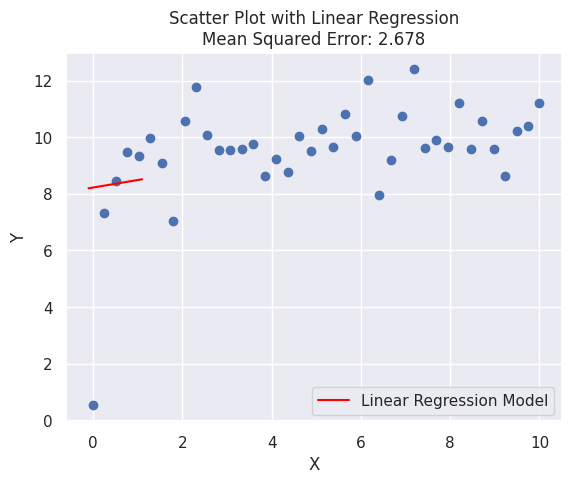

In [ ]:
X = np.linspace(0, 10, 40)  # Create 40 data points from 0 to 10
y = 10 - 1 / (X + 0.1)  # Generate y values with some function
error = 1
y = np.random.normal(y, error)
plt.scatter(X, y)
plt.title("Scatter Plot of Synthetic Data with Error")
plt.xlabel("X")
plt.ylabel("Y")
model = LinearRegression()
model.fit(X.reshape(-1, 1), y)  # Reshape X to 2D
X_test = np.linspace(-0.1, 1.1, 500).reshape(-1, 1)
y_test = model.predict(X_test)
plt.plot(X_test.ravel(), y_test, color='red', label='Linear Regression Model')
mse = mean_squared_error(model.predict(X.reshape(-1, 1)), y)
plt.title(f"Scatter Plot with Linear Regression\nMean Squared Error: {mse:.3f}")
plt.legend()
plt.show()


In [ ]:
import numpy as np


Underfit


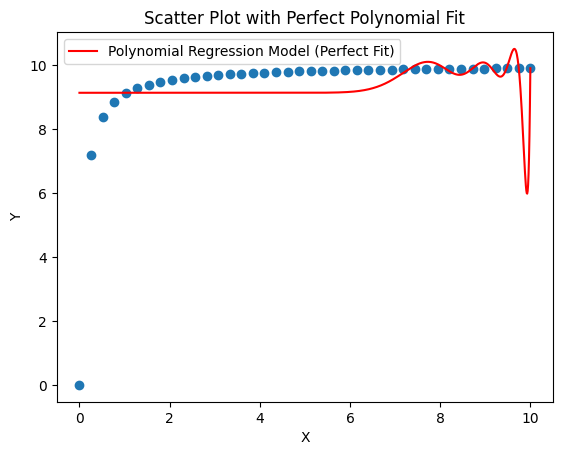

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt  # Import Matplotlib

# Create synthetic data as you did before
X = np.linspace(0, 10, 40)
y = 10 - 1 / (X + 0.1)
error = 0  # Set error to zero to achieve a perfect fit

# Create a high-degree polynomial regression model
degree = 39  # Set a high-degree (one less than the number of data points)
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to the data
model.fit(X.reshape(-1, 1), y)

# Generate a dense set of X_test values
X_test = np.linspace(0, 10, 1000).reshape(-1, 1)

# Predict y values using the model
y_test = model.predict(X_test)

# Plot the perfect fit
plt.scatter(X, y)
plt.plot(X_test, y_test, color='red', label='Polynomial Regression Model (Perfect Fit)')
plt.title("Scatter Plot with Perfect Polynomial Fit")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


perfect fit

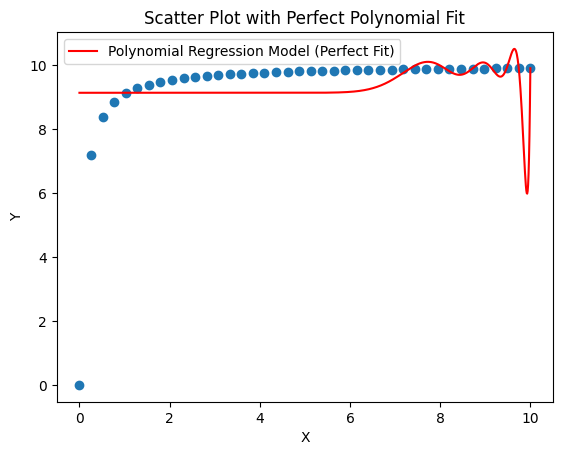

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic data
X = np.linspace(0, 10, 40)
y = 10 - 1 / (X + 0.1)
error = 0  # Set error to zero for a perfect fit

# Create a high-degree polynomial regression model
degree = 39  # Set a high-degree (one less than the number of data points)
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to the data
model.fit(X.reshape(-1, 1), y)

# Generate a dense set of X_test values
X_test = np.linspace(0, 10, 1000).reshape(-1, 1)

# Predict y values using the model
y_test = model.predict(X_test)

# Plot the perfect fit
plt.scatter(X, y)
plt.plot(X_test, y_test, color='red', label='Polynomial Regression Model (Perfect Fit)')
plt.title("Scatter Plot with Perfect Polynomial Fit")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


overfit


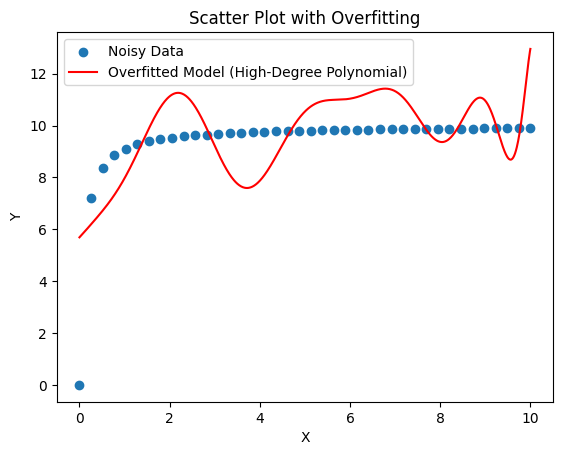

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
X = np.linspace(0, 10, 40)
y = 10 - 1 / (X + 0.1)
error = 2


degree = 15
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())


model.fit(X.reshape(-1, 1), np.random.normal(y, error))


X_test = np.linspace(0, 10, 1000).reshape(-1, 1)


y_test = model.predict(X_test)


plt.scatter(X, y, label='Noisy Data')
plt.plot(X_test, y_test, color='red', label='Overfitted Model (High-Degree Polynomial)')
plt.title("Scatter Plot with Overfitting")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()